In [16]:
import plotly.express as px
import pandas as pd
import plotly.graph_objects as go
from plotly.subplots import make_subplots

## Hard Dist SVDD

In [17]:
train_loss_wo_bn = pd.read_csv('../eval/per2iter_sigmoid/train_loss.txt', names=['loss'])
train_loss_wo_bn = train_loss_wo_bn.reset_index().rename(columns={'index': 'epoch'})
train_loss_wo_bn

,epoch,loss
0,0,4.665494
1,1,4.647077
2,2,4.609610
3,3,4.575449
4,4,4.542398
...,...,...
494,494,1.013451
495,495,1.012949
496,496,1.012448
497,497,1.011949


In [20]:
eval_wo_bn = pd.read_csv('../eval/per2iter_sigmoid/eval_metrics.txt', sep=' ', names=['accuracy', 'precision', 'recall', 'f1'])
eval_wo_bn = eval_wo_bn.reset_index().rename(columns={'index': 'epoch'})
eval_wo_bn['epoch'] = eval_wo_bn['epoch'] * 2
eval_wo_bn

,epoch,accuracy,precision,recall,f1
0,0,1.000000,1.000000,1.000000,1.000000
1,2,1.000000,1.000000,1.000000,1.000000
2,4,0.979167,0.979167,0.979167,0.979167
3,6,0.979167,0.979167,0.979167,0.979167
4,8,0.979167,0.979167,0.979167,0.979167
...,...,...,...,...,...
245,490,1.000000,1.000000,1.000000,1.000000
246,492,1.000000,1.000000,1.000000,1.000000
247,494,1.000000,1.000000,1.000000,1.000000
248,496,1.000000,1.000000,1.000000,1.000000


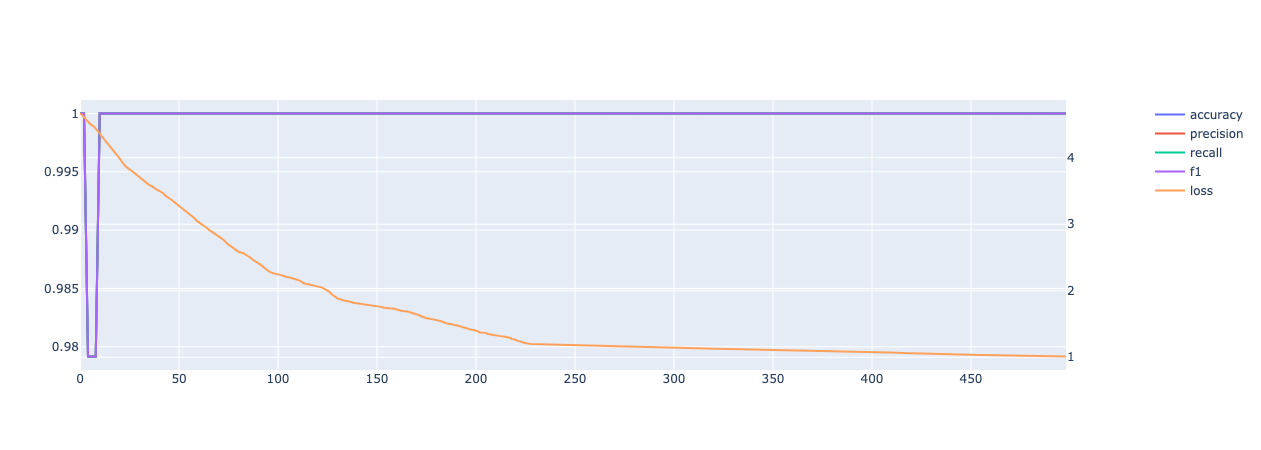

In [21]:
fig = make_subplots(specs=[[{"secondary_y": True}]])

for metric in eval_wo_bn.columns[1:]:
    fig.add_trace(
        go.Scatter(x=eval_wo_bn['epoch'], y=eval_wo_bn[metric],
                   mode='lines',
                   name=metric),
        secondary_y=False
    )

fig.add_trace(
    go.Scatter(x=train_loss_wo_bn['epoch'], y=train_loss_wo_bn['loss'],
                mode='lines',
                name='loss'),
    secondary_y=True,
    
)

In [22]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [23]:
import sys
sys.path.append("../code/")
import os
import torch
import numpy as np
import data_generator
from args import read_args
import tools

In [24]:
args = read_args()
input_data = data_generator.input_data(args=args)

graph_train_id_list = input_data.train_graph_id_list
feature_list = [
            input_data.a_a_edge_embed,
            input_data.a_b_edge_embed,
            input_data.a_c_edge_embed,
            input_data.a_d_edge_embed,
            input_data.a_e_edge_embed,
            input_data.a_f_edge_embed,
            input_data.a_g_edge_embed,
            input_data.a_h_edge_embed,
            input_data.b_a_edge_embed,
            input_data.b_b_edge_embed,
            input_data.b_c_edge_embed,
            input_data.b_d_edge_embed,
            input_data.b_e_edge_embed,
            input_data.b_h_edge_embed
        ]
for i, fl in enumerate(feature_list):
            feature_list[i] = torch.from_numpy(np.array(feature_list[i])).float()

Reading relation files a_a_list.txt
Reading relation files a_b_list.txt
Reading relation files a_c_list.txt
	Processed 4999 lines
Reading relation files a_d_list.txt
	Processed 4999 lines
Reading relation files a_e_list.txt
	Processed 4999 lines
Reading relation files a_f_list.txt
Reading relation files a_g_list.txt
	Processed 4999 lines
Reading relation files a_h_list.txt
Reading relation files b_a_list.txt
Reading relation files b_b_list.txt
Reading relation files b_c_list.txt
	Processed 4999 lines
	Processed 9999 lines
	Processed 14999 lines
	Processed 19999 lines
	Processed 24999 lines
Reading relation files b_d_list.txt
	Processed 4999 lines
	Processed 9999 lines
	Processed 14999 lines
Reading relation files b_e_list.txt
	Processed 4999 lines
	Processed 9999 lines
Reading relation files b_h_list.txt
Reading Node Edge Embedding file ../data/custom_data_simple/incoming_edge_embedding.csv
Creating Neighbour Edge Embeddings


HetAgg(
  (fc_a_a_agg): Linear(in_features=312, out_features=26, bias=True)
  (fc_a_b_agg): Linear(in_features=312, out_features=26, bias=True)
  (fc_a_c_agg): Linear(in_features=312, out_features=26, bias=True)
  (fc_a_d_agg): Linear(in_features=312, out_features=26, bias=True)
  (fc_a_e_agg): Linear(in_features=312, out_features=26, bias=True)
  (fc_a_f_agg): Linear(in_features=312, out_features=26, bias=True)
  (fc_a_g_agg): Linear(in_features=312, out_features=26, bias=True)
  (fc_a_h_agg): Linear(in_features=312, out_features=26, bias=True)
  (fc_b_a_agg): Linear(in_features=312, out_features=26, bias=True)
  (fc_b_b_agg): Linear(in_features=312, out_features=26, bias=True)
  (fc_b_c_agg): Linear(in_features=312, out_features=26, bias=True)
  (fc_b_d_agg): Linear(in_features=312, out_features=26, bias=True)
  (fc_b_e_agg): Linear(in_features=312, out_features=26, bias=True)
  (fc_b_h_agg): Linear(in_features=312, out_features=26, bias=True)
  (fc_het_neigh_agg): Linear(in_features

In [25]:
model = tools.HetAgg(args, feature_list, graph_train_id_list)
model.load_state_dict(torch.load('../eval/per2iter_sigmoid/HetGNN_10.pt'))
model.eval()

HetAgg(
  (fc_a_a_agg): Linear(in_features=312, out_features=26, bias=True)
  (fc_a_b_agg): Linear(in_features=312, out_features=26, bias=True)
  (fc_a_c_agg): Linear(in_features=312, out_features=26, bias=True)
  (fc_a_d_agg): Linear(in_features=312, out_features=26, bias=True)
  (fc_a_e_agg): Linear(in_features=312, out_features=26, bias=True)
  (fc_a_f_agg): Linear(in_features=312, out_features=26, bias=True)
  (fc_a_g_agg): Linear(in_features=312, out_features=26, bias=True)
  (fc_a_h_agg): Linear(in_features=312, out_features=26, bias=True)
  (fc_b_a_agg): Linear(in_features=312, out_features=26, bias=True)
  (fc_b_b_agg): Linear(in_features=312, out_features=26, bias=True)
  (fc_b_c_agg): Linear(in_features=312, out_features=26, bias=True)
  (fc_b_d_agg): Linear(in_features=312, out_features=26, bias=True)
  (fc_b_e_agg): Linear(in_features=312, out_features=26, bias=True)
  (fc_b_h_agg): Linear(in_features=312, out_features=26, bias=True)
  (fc_het_neigh_agg): Linear(in_features

In [26]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_recall_fscore_support, accuracy_score


with open('../eval/per2iter_sigmoid/clf_train_gid_list.txt', 'r') as fin:
    train_list = np.array([int(x) for x in fin.read().strip().split(' ')])
with open('../eval/per2iter_sigmoid/clf_test_gid_list.txt', 'r') as fin:
    test_list = np.array([int(x) for x in fin.read().strip().split(' ')])

with torch.no_grad():
    train_X = model(train_list)
    train_X = np.array(train_X.tolist())
    train_y = np.where((train_list >= 300) & (train_list < 400), 1, 0)

    test_X = model(test_list)
    test_X = np.array(test_X.tolist())
    test_y = np.where((test_list >= 300) & (test_list < 400), 1, 0)

    clf = LogisticRegression(random_state=0, solver='liblinear').fit(train_X, train_y)
    pred = clf.predict(test_X)

    accuracy = accuracy_score(test_y, pred)
    precision, recall, f1, _ = precision_recall_fscore_support(
        test_y, pred, average='micro')
    print(f'\tAccuracy:{accuracy}, Precision:{precision}, Recall:{recall}, f1:{f1}')

	Accuracy:1.0, Precision:1.0, Recall:1.0, f1:1.0
